John David Maunder

#Question 1: 

In [1]:
import os
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import scipy.sparse as sp
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [2]:
import requests
def read_data_from_urls(url):
  """
  This function reads a raw github url, sends a request
  assumes a plain text file present at the url and returns
  the lines of a file
  """
  req = requests.get(url)
  req = req.text
  return req.splitlines()

In [3]:
#Convert URLS
train_data_real_url = "https://raw.githubusercontent.com/aanchan/CS6140-hw1-starter-code/main/question2/data/train/clean_real_train.txt"
train_data_fake_url = "https://raw.githubusercontent.com/aanchan/CS6140-hw1-starter-code/main/question2/data/train/clean_fake_train.txt"
valid_data_real_url = "https://raw.githubusercontent.com/aanchan/CS6140-hw1-starter-code/main/question2/data/dev/clean_real_dev.txt"
valid_data_fake_url = "https://raw.githubusercontent.com/aanchan/CS6140-hw1-starter-code/main/question2/data/dev/clean_fake_dev.txt"

In [4]:
real_news_train_lines = read_data_from_urls(train_data_real_url)
real_news_train_lines

['donald trump do you remember the year since he was elected',
 'trump defends son over emails as moscow hits back',
 'donald trump strategist says media wont easily give back america',
 'anthony scaramucci who is donald trumps new comms director',
 'donald trumps mobile phone use worries security experts',
 'us election donald trump voters exit polls',
 'donald trump signs orders limiting refugee intake',
 'syria regime change trump administration priority un haley says',
 'asx to open higher wall street optimistic trump tax cuts',
 'trump considering new travel ban executive order',
 'us election donald trump tax records suggest no federal taxes',
 'donald trump paris agreement withdrawal leaves world reeling',
 'trump aides called to testify over russia links',
 'trump tweets his glee at fake news',
 'donald trump responds to his twitter account outage',
 'trump accepts russia engaged cyber attacks chief of staff',
 'donald trump announces otto warmbiers death',
 'trumps team says w

In [5]:
fake_news_train_lines = read_data_from_urls(train_data_fake_url)
fake_news_train_lines

['trump warns of vote flipping on machines',
 'this election is not about trump its about a giant middle finger to washington dc',
 'more on trump populism and how it can be controlled by government',
 'trump bollywood ad meant to sway indian american voters is an hilarious fail',
 'dems could be up on charges for inciting trump rally violence',
 'israeli supporters of donald trump rally at jerusalem forever event in israel capital city',
 'whether clinton or trump tensions will escalate with china and russia under next u president',
 'bernie sanders could replace president trump with little known loophole',
 'prepare for 2018 donald trump landslide victory will usher in the coming global shaking',
 'why donald trump must shut down the federal reserve and start issuing debt free money',
 'the president of the united states of america donald j trump',
 'must watch when people laughed at donald trump and anyone who said he would win',
 'trump warns that by attacking assad us will end up 

In [6]:
combined_train_list = real_news_train_lines + fake_news_train_lines

In [7]:
#this is to vecotrize our Data 
vect = CountVectorizer()
cv = vect.fit_transform(combined_train_list)
word_list = vect.get_feature_names()
count_list = cv.toarray().sum(axis = 0)
print (dict(zip(word_list, count_list)))

{'00': 1, '000': 4, '10': 7, '100': 11, '100mln': 1, '10m': 1, '11': 6, '11yo': 1, '12': 7, '13': 5, '14': 3, '15': 1, '150': 1, '17': 1, '180': 1, '184': 4, '19': 1, '1920s': 1, '197': 1, '1990': 1, '20': 1, '20000': 1, '2008': 2, '2016': 9, '2017': 1, '2018': 1, '2020': 2, '20k': 1, '22': 1, '220': 1, '24': 1, '259': 1, '270': 1, '28': 1, '2gb': 1, '30': 2, '306': 1, '31k': 1, '32': 1, '34': 1, '34m': 1, '35': 2, '37': 1, '42': 2, '43': 1, '44': 2, '452000': 1, '457': 1, '45th': 3, '49': 1, '50': 1, '500': 1, '60': 3, '6th': 1, '70': 3, '75': 1, '750': 2, '75th': 2, '83': 1, '87': 1, '8th': 1, '90': 1, '90k': 1, '91': 1, '95': 1, '97yo': 1, 'aback': 2, 'abandon': 3, 'abandoned': 1, 'abandons': 1, 'abbott': 2, 'abc': 2, 'abductions': 1, 'abe': 4, 'abedin': 1, 'abetz': 1, 'ability': 1, 'able': 2, 'abortion': 1, 'abortions': 1, 'about': 58, 'abroad': 1, 'absolutely': 2, 'absurd': 1, 'abuse': 2, 'abusing': 1, 'academy': 1, 'accept': 2, 'accepting': 1, 'accepts': 3, 'accerate': 1, 'access

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [8]:
#This is to build our Training Labels 
num_train_real = len(real_news_train_lines)
num_train_fake = len(fake_news_train_lines)
#create label vectors for training data 
y_train_real  = np.ones(num_train_real)
y_train_fake =  np.zeros(num_train_fake)
y_train = np.concatenate((y_train_real, y_train_fake,), axis = 0)
y_train.shape


(2286,)

In [9]:
#this is a second way we can build our training data set 
train_data_real = vect.transform(real_news_train_lines)
train_data_fake = vect.transform(fake_news_train_lines)
train_data = sp.vstack((train_data_real, train_data_fake))

## Logistic regression with Penalty 1 (Question 1B)




In [10]:
clf = LogisticRegression(random_state= 0, penalty="l1", solver = "liblinear")

In [11]:
clf.fit(X=train_data, y=y_train)

LogisticRegression(penalty='l1', random_state=0, solver='liblinear')

In [12]:
clf.coef_

array([[ 0.        , -0.8685531 , -2.44540044, ...,  0.        ,
         0.        ,  0.        ]])

##Logistic regression with Penalty 2 (Question 1C)

In [13]:
clf_l2 = LogisticRegression(random_state= 0, penalty="l2", solver = "liblinear")

In [14]:
clf_l2.fit(X=train_data, y=y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [15]:
clf_l2.coef_

array([[-0.09543424, -0.74532981, -1.19325418, ...,  0.03614307,
        -0.21448325, -0.29216763]])

##Logistic regression with NO Penalty  (Question 1A)

In [16]:
clf_l3 = LogisticRegression(random_state=0, penalty= "none").fit(X = train_data, y=y_train)

In [17]:
clf_l3.coef_

array([[ -2.89911235, -25.18306529, -43.20766116, ...,   1.08200606,
         -7.86801548,  -8.66154041]])

#Question 2 Evaluating our Models

In [18]:
fake_news_test_lines = read_data_from_urls(valid_data_fake_url)
fake_news_test_lines

['watch trump gropes humiliates miss universe just to get revenge',
 'you re not alone we re with you video aims to help you adjust to new trump reality',
 'donald trump el primer presidente naranja de los estados unidos',
 'maga mania ford motor company calls donald trump to say they wont be moving to mexico',
 'comment on maryland trump supporter they switched my vote to hillary by misterdawg',
 'this is donald trump favorite thing he has in common with his daughter',
 'trump campaign being sued for humiliating skittles candy by comparing it to syrian muslim infiltrators',
 'breaking illegal alien causes 61 million in damage has been deported 5 times trump is pissed',
 'obama just blasted fbi director for smearing hillary to help trump',
 'trump has gotten the republican party sued for trying to intimidate voters',
 'destruction of walk of fame star leaves donald trump down to his last six horcruxes',
 'breaking since donald trump won the presidency ford shifts truck production from 

In [19]:
real_news_test_lines = read_data_from_urls(valid_data_real_url)
real_news_test_lines

['donald trump charlottesville comments praised by supporters',
 'trumps new us immigration plan to be based on australias',
 'trump presidency could bring range of economic disasters eslake',
 'donald trump jerusalem announcement will shake middle east peace',
 'getting to know donald trump',
 'trump defends australia comments on us refugee deal',
 'pena nieto congratulates trump promises to protect mexicans',
 'hillary clinton how losing to donald trump changed her',
 'trump adviser conway draws ethics complaints for touting ivanka',
 'donald trump meets pope in vatican',
 'hillary clinton takes on trump administration in latest speech',
 'un warns of heat as climate talks seek action despite trump',
 'trump warm embrace for turnbull and aussie health care',
 'charlie gard donald trump offers to help terminally ill uk baby',
 'opinion dave levinthal washington reels but trump faces battle',
 'trump putin held a second undisclosed meeting at g20 summit',
 'joe biden tells donald trump

In [20]:
#Vectorizing our testing set
test_data_real = vect.transform(real_news_test_lines)
test_data_fake = vect.transform(fake_news_test_lines)
x_test = sp.vstack((test_data_real, test_data_fake))

In [21]:
#create label vectors for testing data 
num_test_real = len(real_news_test_lines)
num_test_fake = len(fake_news_test_lines)

y_test_real  = np.ones(num_test_real)
y_test_fake =  np.zeros(num_test_fake)
y_test = np.concatenate((y_test_real, y_test_fake,), axis = 0)

y_test.shape

(490,)

##Penalty 1 Logistic Regression

In [22]:
clf.score(x_test, y_test)

0.8224489795918367

##Penalty 2 Logistic Regression

In [23]:
clf_l2.score(x_test, y_test)

0.826530612244898

##Logistic Regression with no Penalty

In [24]:
clf_l3.score(x_test, y_test)

0.8285714285714286

#Question 3 Eli 5 -Vizualize results

In [25]:
!pip install eli5

In [26]:
from eli5 import show_weights 
#For Penalty 1 Logistic Regression
show_weights(clf, feature_names =  vect.get_feature_names(), top =50)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Weight?,Feature
+2.418,australia
+2.320,<BIAS>
+2.298,trumps
+2.137,accept
+1.968,turnbull
+1.756,climate
+1.509,korea
+1.485,says
+1.439,ban
+1.342,scaramucci


In [27]:
#For Penalty 2 Logistic Regression 
show_weights(clf_l2, feature_names =  vect.get_feature_names(), top =50)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Weight?,Feature
+2.206,<BIAS>
+1.882,trumps
+1.363,australia
+1.360,says
+1.288,turnbull
+1.230,us
+1.226,donald
+1.120,tax
+1.066,north
+1.049,ban


In [28]:
#No Penalty Logistic Regression
show_weights(clf_l3, feature_names =  vect.get_feature_names(), top =50)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Weight?,Feature
+76.112,trumps
+63.415,australia
+61.178,turnbull
+53.537,ban
+47.813,korea
+47.222,climate
+46.070,accept
+42.538,travel
+39.683,tax
+39.082,fake


In [29]:
tr =  vect.transform(["why iranian american pastor held hostage in iran is voting for donald trump"])

In [30]:
clf.predict_proba(tr)

array([[0.83629576, 0.16370424]])

In [31]:
from eli5 import show_prediction
##Penalty 1 Logistic Regression, showing predection
show_prediction(clf,tr.reshape(1,-1), feature_names =  vect.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [32]:
#Penalty 2 Logistic Regression, showing predection
show_prediction(clf_l2,tr.reshape(1,-1), feature_names =  vect.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [33]:
#No Penalty Logistic Regression, showing predection
show_prediction(clf_l3,tr.reshape(1,-1), feature_names =  vect.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


#Question 4 Part 1

## Plotting Histrogram for L1 Penalty

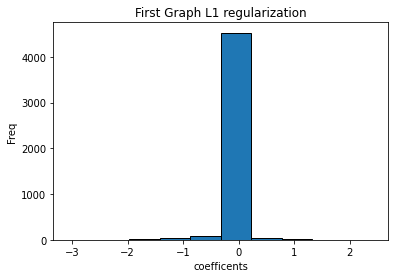

In [34]:
import matplotlib.pyplot as plt
plt.hist(clf.coef_[0], edgecolor = 'black')
plt.xlabel('coefficents')
plt.ylabel('Freq')
plt.title('First Graph L1 regularization')
plt.show()

## Plotting Histogram for L2 Penalty

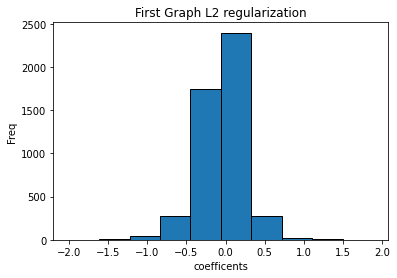

In [35]:
import matplotlib.pyplot as plt
plt.hist(clf_l2.coef_[0], edgecolor = 'black')
plt.xlabel('coefficents')
plt.ylabel('Freq')
plt.title('First Graph L2 regularization')
plt.show()

L1 Lasso regularization (absolute error) tends to converge data certain data points to zero and it expands larger values out. This is compare to Ridge regularization which takes the squared magnitude error of the coefficients which push the coefficients towards zero but excatly too zero. 
Lasso regularization can seen above in our first graph. Here the L1 penalty had a large amount of coefficients become zero. This means that the features with zero coefficients at inference time will essentially become useless and unimportant since anything mutiplied by zero is zero. Since we arent squaring values, the larger more important coefficients will keep their value, giving them more importantance during inference time when deciding a class. 

This is slightly the opposite for Ridge regularization which our second grpah is depicting. Since Ridge regularization does not push a lot of values to zero, more coefficients will have some input (albeit small amount), thus giving more features some value. Since we are squaring these feature coefficients, the non zero features will carry less weight at time of inference compared to lasso regularization since there coeffficients are smaller. 

# Question 4 Part 2 B

## PCA Component 

First Part is To import the new Data 

In [36]:
clean_fake2 = "https://github.com/aanchan/CS6140-hw1-starter-code/blob/main/data/clean_fake.txt" 
clean_real2 = "https://github.com/aanchan/CS6140-hw1-starter-code/blob/main/data/clean_real.txt"

In [ ]:
real_news_lines2 = read_data_from_urls(clean_real2)
real_news_lines2

In [ ]:
fake_news_lines2 = read_data_from_urls(clean_fake2)
fake_news_lines2

In [39]:
combined_train_list2 = real_news_lines2 + fake_news_lines2 

In [40]:
#This is to format the new Data into vectorized components
train_data_real2 = vect.transform(real_news_lines2)
train_data_fake2 = vect.transform(fake_news_lines2)
train_data2 = sp.vstack((train_data_real2, train_data_fake2))

In [41]:
#This is to get the Labels for the X Values 
num_train_real2 = len(real_news_lines2)
num_train_fake2 = len(fake_news_lines2)
#create label vectors for training data 
y_train_real2  = np.ones(num_train_real2)
y_train_fake2 =  np.zeros(num_train_fake2)
y_train_data2 = np.concatenate((y_train_real2, y_train_fake2,), axis = 0)
y_train_data2.shape

(16234,)

In [42]:
from sklearn.model_selection import train_test_split

### PCA 100

In [43]:
from sklearn.decomposition import TruncatedSVD
#import and convert our vectorized data (train_data2) into a smaller dimension
svd = TruncatedSVD(n_components=147, n_iter=7, random_state=42)
pca_train_data_147 = svd.fit(train_data2).transform(train_data2)

In [44]:
import sklearn.metrics
from sklearn.model_selection import cross_validate 

#Make new Regression Model 
clf_l3_part_2 = LogisticRegression(random_state=0, penalty = "none", max_iter= 1000, solver = "newton-cg")

#Run and return format into a new score 
scores = cross_validate(clf_l3_part_2, pca_train_data_147, y_train_data2, cv=5, scoring= ('accuracy','precision','recall','f1'))

#Print our results in a nice format 
average_precision = scores['test_precision']
average_recall = scores['test_recall']
average_F1 = scores['test_f1']
average_accuracy = scores['test_accuracy']
print("Cross Validation with no penalty and PCA = 100")
print("Accuracy:  {0:.4f}%".format((sum(average_accuracy)/len(average_accuracy))*100))
print("precision: {0:.4f}%".format((sum(average_precision)/len(average_precision))*100))
print("Recall:    {0:.4f}%".format((sum(average_recall)/len(average_recall))*100))
print("F1:        {0:.4f}%".format((sum(average_F1)/len(average_F1))*100))

Cross Validation with no penalty and PCA = 100
Accuracy:  62.3445%
precision: 61.7707%
Recall:    92.4302%
F1:        73.9265%


### PCA 1000

In [60]:
#I understand this is suppose to be 1000, but it took to long to run at 1047. I cut it in half just for testing purposes
svd2 = TruncatedSVD(n_components=547, n_iter=7, random_state=42)
#import and convert our vectorized data (train_data2) into a smaller dimension
pca_train_data_1047 = svd2.fit(train_data2).transform(train_data2)

In [61]:
#new Model 
clf_l3_part_1047 = LogisticRegression(random_state=0, penalty = "none", max_iter= 1000, solver = "newton-cg")

#Run and return format into a new score
scores = cross_validate(clf_l3_part_1047, pca_train_data_1047, y_train_data2, cv=5, scoring= ('accuracy','precision','recall','f1'))

#Print our results in a nice format 
average_precision = scores['test_precision']
average_recall = scores['test_recall']
average_F1 = scores['test_f1']
average_accuracy = scores['test_accuracy']

print("Cross Validation with no penalty and PCA = 1047")
print("Accuracy:  {0:.4f}%".format((sum(average_accuracy)/len(average_accuracy))*100))
print("precision: {0:.4f}%".format((sum(average_precision)/len(average_precision))*100))
print("Recall:    {0:.4f}%".format((sum(average_recall)/len(average_recall))*100))
print("F1:        {0:.4f}%".format((sum(average_F1)/len(average_F1))*100))

Cross Validation with no penalty and PCA = 1047
Accuracy:  62.1843%
precision: 61.6660%
Recall:    92.3772%
F1:        73.8643%


# Question 4 Part 2 A

## NON PCA REDUCTION

In [54]:
#Build new testing and training sets for the NON PCA components
x_train4, x_test4, y_train4, y_test4 = train_test_split(train_data2, y_train_data2, test_size =0.2, random_state= 4)

### This is for Cross Validation with L1 penalty 

In [55]:
#Make new Regression Model 
clf_l1_part2 = LogisticRegression(random_state= 0, penalty="l1", solver = "liblinear")

#Run and return format into a new score 
scores = cross_validate(clf_l1_part2, x_train4, y_train4, cv=5, scoring= ('accuracy','precision','recall','f1'))

#Print our results in a nice format 
average_precision = scores['test_precision']
average_recall = scores['test_recall']
average_F1 = scores['test_f1']
average_accuracy = scores['test_accuracy']
print("Cross Validation with L1 penalty and no PCA")
print("Accuracy:  {0:.4f}%".format((sum(average_accuracy)/len(average_accuracy))*100))
print("precision: {0:.4f}%".format((sum(average_precision)/len(average_precision))*100))
print("Recall:    {0:.4f}%".format((sum(average_recall)/len(average_recall))*100))
print("F1:        {0:.4f}%".format((sum(average_F1)/len(average_F1))*100))

Cross Validation with L1 penalty and no PCA
Accuracy:  61.7310%
precision: 61.1122%
Recall:    94.5200%
F1:        74.2304%


### This is for Cross Validation with L2 penalty

In [56]:
#Make new Regression Model 
clf_l2_part2 = LogisticRegression(random_state= 0, penalty="l2", solver = "liblinear",)

#Run and return format into a new score 
scores = cross_validate(clf_l2_part2, x_train4, y_train4, cv=5, scoring= ('accuracy','precision','recall','f1'))

#Print our results in a nice format 
average_precision = scores['test_precision']
average_recall = scores['test_recall']
average_F1 = scores['test_f1']
average_accuracy = scores['test_accuracy']
print("Cross Validation with L2 penalty and no PCA")
print("Accuracy:  {0:.4f}%".format((sum(average_accuracy)/len(average_accuracy))*100))
print("precision: {0:.4f}%".format((sum(average_precision)/len(average_precision))*100))
print("Recall:    {0:.4f}%".format((sum(average_recall)/len(average_recall))*100))
print("F1:        {0:.4f}%".format((sum(average_F1)/len(average_F1))*100))

Cross Validation with L2 penalty and no PCA
Accuracy:  61.6155%
precision: 61.1514%
Recall:    93.7013%
F1:        74.0053%


### This is for Cross Validation with no Penalty 

In [57]:
#Make new Regression Model 
clf_noPenalty_part2 = LogisticRegression(random_state=0, max_iter= 1000, penalty="none", solver = "newton-cg")

#Run and return format into a new score 
scores = cross_validate(clf_noPenalty_part2, x_train4, y_train4, cv=5, scoring= ('accuracy','precision','recall','f1'))

#Print our results in a nice format 
average_precision = scores['test_precision']
average_recall = scores['test_recall']
average_F1 = scores['test_f1']
average_accuracy = scores['test_accuracy']
print("Cross Validation with no penalty and no PCA")
print("Accuracy:  {0:.4f}%".format((sum(average_accuracy)/len(average_accuracy))*100))
print("precision: {0:.4f}%".format((sum(average_precision)/len(average_precision))*100))
print("Recall:    {0:.4f}%".format((sum(average_recall)/len(average_recall))*100))
print("F1:        {0:.4f}%".format((sum(average_F1)/len(average_F1))*100))

Cross Validation with no penalty and no PCA
Accuracy:  59.1438%
precision: 60.0907%
Recall:    89.1325%
F1:        71.7854%


Between logistic regression with L1 and L2 regualirzation, we noticed a small difference. L1 did preform better most likley due to the fact that it gave more weight to words that are likely to indicate the "fake" or "real" class instead of words can could easily occur in both of these classes like the words "the", "to", or "other". We did not clean the data for common words before we put it into the logistic regression model meaning the L2 model will still count these words, while the L1 model might not. 

When comparing the L1 and L2 regression models to the model with no penalty and no PCA, the no penalty and no PCA model preformed the worse. This makes sense as the regularization models tend to clean up the coefficients by forcing them to be smaller, and by knocking the unimportant features by making them zero or close to zero. The no penalty model will not do this and thus add unimportant/redundant features to the logisitc regression model. 

PCA with 100, preformed worse than the L1 and L2 models but did better than the no penalty no PCA model. This makes sense as PCA will tend to get rid of redundant coefficients which will optimize the model. This PCA is similar to L1 regularization in the sense that it will get rid of unimportant features. If we do have less features with the somewhat same preformance, we may want to use the slighlty less preforming model since the PCA 100 model will require less storage and will run faster at inference since the calculation will be smaller. 

PCA with 1000 preformed pretty much the same as PCA 100. This indicates that we can reduce our coefficients without losing virtually any accuracy. This is nice since we can minimize the space we need to store our data in. Furthermore, this indicates that the is probably a decent amount of data that is redunant and is not adding to our model. 

The fastest models to run where the models with liblinear as the algorithm (L1 and L2 models). I believe the reason for this is at testing time the coefficients are smaller and thus minimzing the amount of time the CPU and GPU need to make to compute the scores of the model.
